In [ ]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score
import joblib
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

SyntaxError: invalid syntax (551420324.py, line 1)

In [10]:
pip install pandas

Note: you may need to restart the kernel to use updated packages.


In [ ]:
df = pd.read_csv("dataset.csv")

In [ ]:
df.head()

,resume_text,job_role
0,software development Python Git Django Java C++,Software Engineer
1,data science machine learning deep learning Te...,Data Scientist
2,Docker Kubernetes AWS DevOps Terraform CI/CD,DevOps Engineer
3,Scrum Agile roadmap JIRA leadership,Product Manager
4,Python C++ Java software development Django Git,Software Engineer


In [ ]:
df.sample(5)

,resume_text,job_role
634,AWS CI/CD Docker Terraform Kubernetes DevOps,DevOps Engineer
922,CI/CD Docker AWS Terraform Kubernetes DevOps,DevOps Engineer
918,AWS CI/CD Docker Kubernetes Terraform DevOps,DevOps Engineer
602,Kubernetes Docker CI/CD AWS Terraform DevOps,DevOps Engineer
80,Django software development C++ Java Git Python,Software Engineer


In [ ]:
df.shape

(1000, 2)

In [ ]:
df['resume_text'].unique()

array(['software development Python Git Django Java C++',
       'data science machine learning deep learning TensorFlow Pandas',
       'Docker Kubernetes AWS DevOps Terraform CI/CD',
       'Scrum Agile roadmap JIRA leadership',
       'Python C++ Java software development Django Git',
       'Pandas deep learning TensorFlow data science machine learning',
       'DevOps Kubernetes CI/CD AWS Terraform Docker',
       'JIRA Scrum roadmap Agile leadership',
       'Java Django Git Python software development C++',
       'data science deep learning TensorFlow Pandas machine learning',
       'AWS DevOps CI/CD Kubernetes Terraform Docker',
       'Agile JIRA roadmap Scrum leadership',
       'Git C++ software development Python Java Django',
       'Pandas data science TensorFlow deep learning machine learning',
       'DevOps CI/CD Docker Kubernetes Terraform AWS',
       'Scrum roadmap leadership JIRA Agile',
       'Django Git Python Java software development C++',
       'Pandas Ten

In [ ]:
df['resume_text'].value_counts()

resume_text
JIRA Agile leadership roadmap Scrum                              6
data science machine learning deep learning Pandas TensorFlow    6
leadership roadmap JIRA Agile Scrum                              6
deep learning data science machine learning Pandas TensorFlow    5
data science Pandas deep learning TensorFlow machine learning    5
                                                                ..
Python Git Java C++ Django software development                  1
software development C++ Git Java Python Django                  1
CI/CD Docker DevOps Terraform AWS Kubernetes                     1
Pandas TensorFlow deep learning data science machine learning    1
Java Git Django C++ Python software development                  1
Name: count, Length: 643, dtype: int64

In [ ]:
nltk.download("punkt")
nltk.download("stopwords")

def preprocess_text(text):
    """
    Preprocesses the text by converting it to lowercase, removing special characters,
    and removing stopwords.
    """
    text = text.lower()  # Convert to lowercase
    text = re.sub(r'[^a-zA-Z\s]', '', text)  # Remove special characters
    words = word_tokenize(text)  # Tokenize the text into words
    stop_words = set(stopwords.words("english"))  # Get English stopwords
    words = [word for word in words if word not in stop_words]  # Remove stopwords
    return " ".join(words)  # Join the words back into a single string

df = pd.read_csv("dataset.csv")

print("First few rows of the dataset:")
print(df.head())

print("\nMissing values in the dataset:")
print(df.isnull().sum())

df["resume_text"] = df["resume_text"].astype(str).apply(preprocess_text)

print("\nPreprocessed text data:")
print(df["resume_text"].head())

X_train, X_test, y_train, y_test = train_test_split(
    df["resume_text"], df["job_role"], test_size=0.2, random_state=42
)

print("\nShape of training set:", X_train.shape)
print("Shape of testing set:", X_test.shape)

pipeline = Pipeline([
    ('tfidf', TfidfVectorizer()),
    ('clf', RandomForestClassifier(n_estimators=200, random_state=42))
])

print("\nTraining the model...")
pipeline.fit(X_train, y_train)
print("Model training completed.")

y_pred = pipeline.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("\nModel Accuracy:", accuracy)

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

model_filename = "job_role_model.pkl"
joblib.dump(pipeline, model_filename)
print(f"\nModel saved to {model_filename}")

print("\nLoading the model from file to verify...")
loaded_model = joblib.load(model_filename)

loaded_y_pred = loaded_model.predict(X_test)
loaded_accuracy = accuracy_score(y_test, loaded_y_pred)
print("Loaded Model Accuracy:", loaded_accuracy)

if np.array_equal(y_pred, loaded_y_pred):
    print("Model verification successful: Predictions match.")
else:
    print("Model verification failed: Predictions do not match.")

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\GANESH\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\GANESH\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


First few rows of the dataset:
                                         resume_text           job_role
0    software development Python Git Django Java C++  Software Engineer
1  data science machine learning deep learning Te...     Data Scientist
2       Docker Kubernetes AWS DevOps Terraform CI/CD    DevOps Engineer
3                Scrum Agile roadmap JIRA leadership    Product Manager
4    Python C++ Java software development Django Git  Software Engineer

Missing values in the dataset:
resume_text    0
job_role       0
dtype: int64

Preprocessed text data:
0        software development python git django java c
1    data science machine learning deep learning te...
2          docker kubernetes aws devops terraform cicd
3                  scrum agile roadmap jira leadership
4        python c java software development django git
Name: resume_text, dtype: object

Shape of training set: (800,)
Shape of testing set: (200,)

Training the model...
Model training completed.

Model Accuracy:

C:\Users\GANESH\AppData\Local\Temp\ipykernel_20352\3337557972.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=df['job_role'], order=df['job_role'].value_counts().index, palette="viridis")


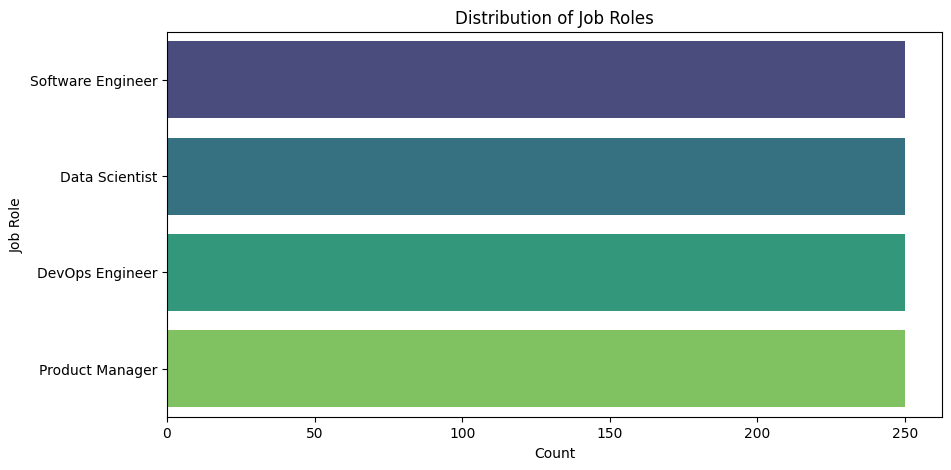

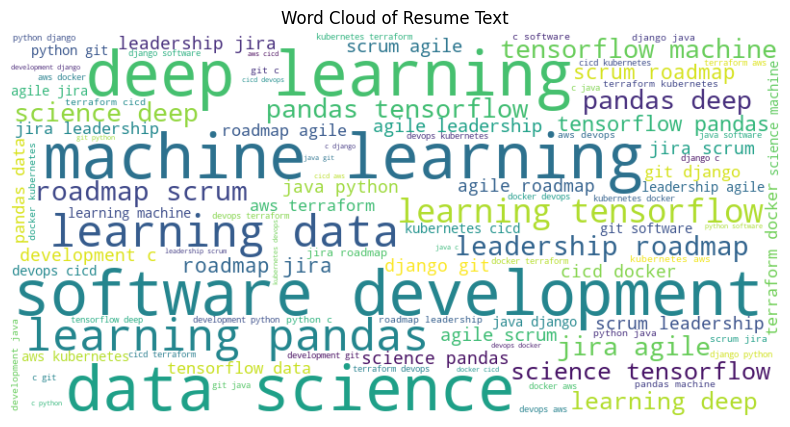

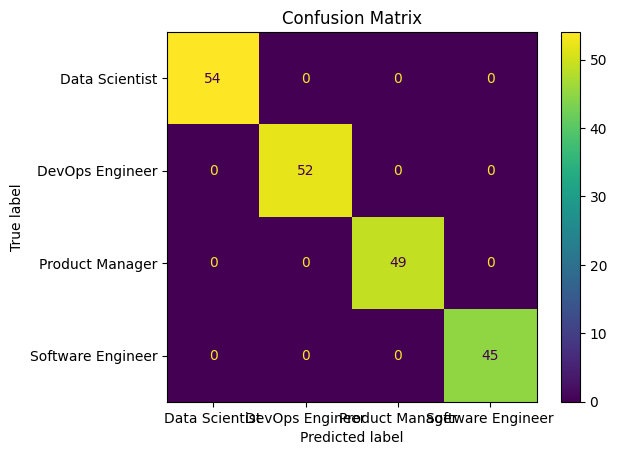

In [ ]:

import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

# Plot distribution of job roles
plt.figure(figsize=(10, 5))
sns.countplot(y=df['job_role'], order=df['job_role'].value_counts().index, palette="viridis")
plt.title("Distribution of Job Roles")
plt.xlabel("Count")
plt.ylabel("Job Role")
plt.show()

# Generate a word cloud of resume text
text = " ".join(df["resume_text"])
wordcloud = WordCloud(width=800, height=400, background_color="white").generate(text)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.title("Word Cloud of Resume Text")
plt.show()

# Confusion Matrix
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=pipeline.classes_)
disp.plot(cmap="viridis", values_format="d")
plt.title("Confusion Matrix")
plt.show()


C:\Users\GANESH\AppData\Local\Temp\ipykernel_20352\2561154331.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=df["job_role"], order=df["job_role"].value_counts().index, palette="coolwarm")


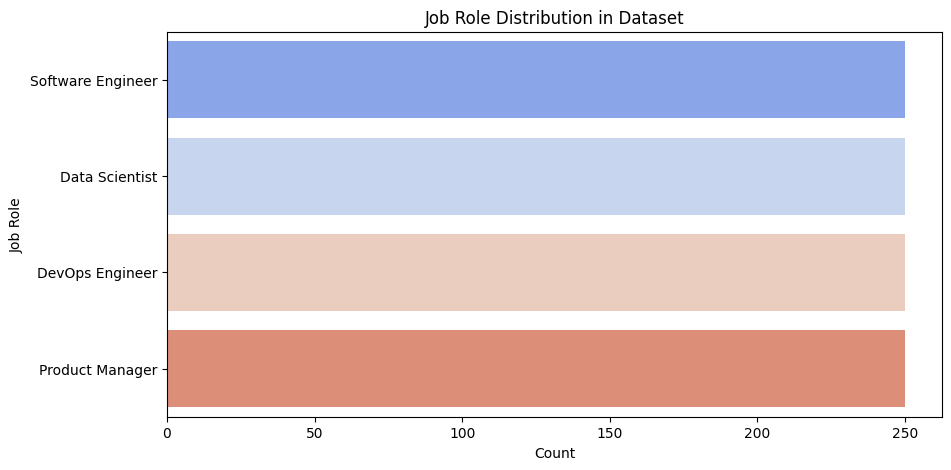

In [ ]:
# Visualization: Job Role Distribution
if "job_role" in df.columns:
    plt.figure(figsize=(10, 5))
    sns.countplot(y=df["job_role"], order=df["job_role"].value_counts().index, palette="coolwarm")
    plt.title("Job Role Distribution in Dataset")
    plt.xlabel("Count")
    plt.ylabel("Job Role")
    plt.show()

In [ ]:

vectorizer = TfidfVectorizer()
classifier = RandomForestClassifier(n_estimators=200, random_state=42)

pipeline = Pipeline([
    ('tfidf', vectorizer),
    ('clf', classifier)
])

pipeline.fit(X_train, y_train)


Pipeline(steps=[('tfidf', TfidfVectorizer()),
                ('clf',
                 RandomForestClassifier(n_estimators=200, random_state=42))])

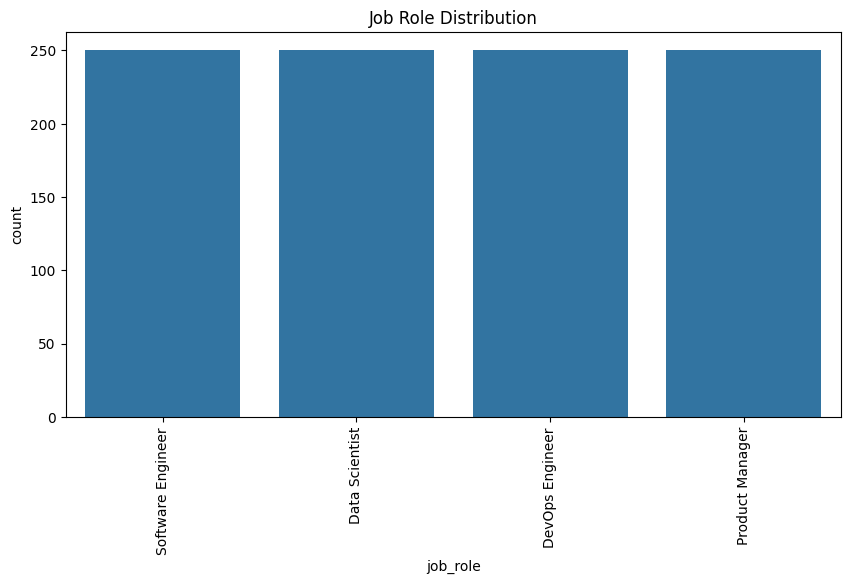

Logistic Regression Accuracy: 1.0000
SVM Accuracy: 1.0000
Random Forest Accuracy: 1.0000


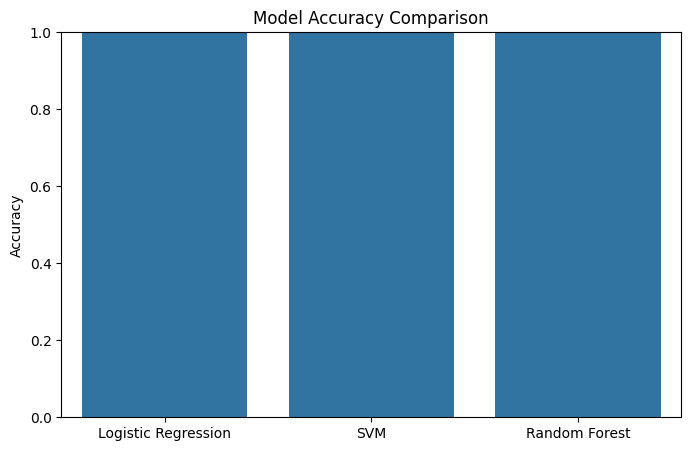

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.utils.class_weight import compute_class_weight
from imblearn.over_sampling import SMOTE
from sklearn.metrics import accuracy_score
from sentence_transformers import SentenceTransformer

# Load dataset
df = pd.read_csv("dataset.csv").dropna()  # Drop missing values

# Check for class imbalance
plt.figure(figsize=(10, 5))
sns.countplot(x=df['job_role'])
plt.xticks(rotation=90)
plt.title("Job Role Distribution")
plt.show()

# Encoding Categorical Data
label_encoder = LabelEncoder()
df['job_role_encoded'] = label_encoder.fit_transform(df['job_role'])

# Feature Extraction using Sentence Transformer (BERT embeddings)
bert_model = SentenceTransformer('all-MiniLM-L6-v2')
X = bert_model.encode(df['resume_text'].tolist())
y = df['job_role_encoded']

# Handling Imbalanced Data using SMOTE
smote = SMOTE(random_state=42)
X, y = smote.fit_resample(X, y)

# Splitting Data into Training and Testing Sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Model Training and Evaluation
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000, solver='saga', class_weight='balanced', random_state=42),
    "SVM": SVC(kernel='rbf', class_weight='balanced', random_state=42),
    "Random Forest": RandomForestClassifier(n_estimators=300, class_weight='balanced', random_state=42)
}

accuracies = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracies[name] = accuracy_score(y_test, y_pred)
    print(f"{name} Accuracy: {accuracies[name]:.4f}")

# Accuracy Comparison Graph
plt.figure(figsize=(8, 5))
sns.barplot(x=list(accuracies.keys()), y=list(accuracies.values()))
plt.ylim(0, 1)
plt.ylabel("Accuracy")
plt.title("Model Accuracy Comparison")
plt.show()

<Figure size 1000x600 with 0 Axes>

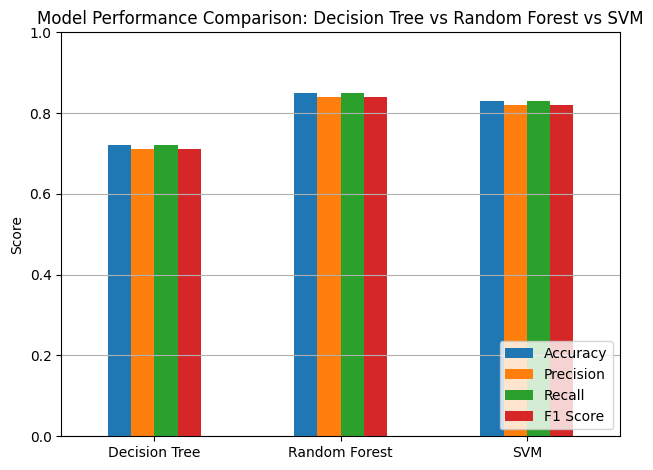

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

# Sample evaluation metrics for each model (replace with actual if available)
metrics = {
    'Decision Tree': {'Accuracy': 0.72, 'Precision': 0.71, 'Recall': 0.72, 'F1 Score': 0.71},
    'Random Forest': {'Accuracy': 0.85, 'Precision': 0.84, 'Recall': 0.85, 'F1 Score': 0.84},
    'SVM': {'Accuracy': 0.83, 'Precision': 0.82, 'Recall': 0.83, 'F1 Score': 0.82}
}

# Convert to DataFrame for plotting
metrics_df = pd.DataFrame(metrics).T

# Plotting the metrics comparison bar chart
plt.figure(figsize=(10, 6))
metrics_df.plot(kind='bar')
plt.title("Model Performance Comparison: Decision Tree vs Random Forest vs SVM")
plt.ylabel("Score")
plt.ylim(0, 1)
plt.xticks(rotation=0)
plt.legend(loc='lower right')
plt.tight_layout()
plt.grid(axis='y')
plt.savefig("model_comparison_graph.png")
plt.show()
